# Foundations of Data Science
Winter 2025
Group 17

## Team members
- Jack (Xianguo) Hao
- Kunwar Dhruv Sethi
- Eric Ramalheiro
- Lucas Hele
- Faiza Qayoom
- Miguel Morales

---

## **1. Problem Definition**
### **Hypothesis and Objectives of our Analysis**

The affordability of different regions is significantly influenced by the comparison between the total cost of living and the average family income. This study will explore key questions about how household size and structure, as well as geographic location, impact the total cost of living, including the linearity or non-linearity of cost relative to household size.

Specifically:
- Metropolitan vs. Non-Metropolitan Areas:
Metropolitan areas typically have higher living costs, particularly for housing, transportation, and goods. Non-metropolitan areas generally exhibit a lower cost of living relative to income. This disparity is largely due to differences in housing markets, public transportation availability, and the concentration of goods and services in urban areas.

- Key Expense Categories:
Housing, transportation, and healthcare are the primary contributors to the cost of living. In metropolitan areas, housing tends to be the most significant expense, driven by high demand and limited supply. Transportation costs also tend to be higher in cities with less access to public transit. Non-metropolitan areas may see higher costs in some categories, but they often experience lower housing and transportation costs relative to income.

- Cost of Living and Household Size:
The total cost of living may not be linearly related to household size—it could be sub-linear or super-linear. As household size increases, some costs (e.g., food, utilities) may scale less than proportionally, while others (e.g., housing) may increase at a faster rate. The impact of family structure (e.g., parents vs. children) on cost should also be considered, as different family dynamics may influence expenses differently.

- Exploring Linearity (or Non-Linearity) of Costs as a Function of Household Size:
One of the central questions of this study is whether the total cost of living scales linearly with household size, or if it is sub-linear (costs increase less than proportionally with more members) or super-linear (costs increase more than proportionally). Additionally, the analysis will explore the following:
Is the total cost a linear function of the number of household members, or is it sub-linear or super-linear?
Considering cost as a function of 1 variable (total household members) or as a function of 2 variables (e.g., parents and children). Additionally, we will explore whether households follow the nuclear family model or if there are other family structures in the data (which could affect the relationship between size and cost).
Does the function vary over location? We will assess whether the relationship between household size and cost differs across metropolitan and non-metropolitan areas and whether we need to normalize the data by location.
If we analyze individual costs separately (housing, transportation, healthcare), will this change the conclusions? For example, housing may exhibit different scaling behavior compared to transportation or groceries.

- Regional Variation:
The relationship between household size and cost may vary depending on geographic location. Metropolitan areas may see more pronounced increases in housing costs as household size grows, while non-metropolitan areas may experience more stable or lower increases. Normalizing for regional differences will be necessary to understand the broader patterns of affordability.

- Individual Expense Categories:
Analyzing cost components individually (housing, transportation, healthcare) may yield different insights compared to considering total costs. For example, transportation may represent a larger share of the total cost in non-metropolitan areas, while housing will likely be the dominant cost in metropolitan regions. Examining these expenses separately can provide a clearer understanding of the drivers of cost in different regions.

---

## 2. Data Preparation
### **Importing Modules**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import geopandas as gpd

### **Reading the data**

In [73]:
# Load the dataset
# The dataset contains the cost of living in various US cities
df = pd.read_csv('../data/cost_of_living_us.csv', na_values = '\xa0')
df.head(4)
#df.tail(4)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062


### **Inspecting the Data** 

- Check for missing values and Garbage values

In [74]:
# Note - Columns 
# Using the info() method to get a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [75]:
# Note - Describe for int / float values
# Using the describe() method to get a summary of the DataFrame
df.describe()

,case_id,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
count,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31420.000000
mean,1589.311804,11073.673539,8287.504557,13593.856381,13394.031748,7015.318377,9879.584233,7657.714782,70901.683601,68315.997017
std,917.218414,4165.606147,3271.140249,1640.456562,5204.545710,2397.415490,6778.223399,3339.795571,21846.545235,16886.970245
min,1.000000,4209.311280,2220.276840,2216.461440,3476.379960,2611.642080,0.000000,1027.800756,30087.662400,25529.976562
25%,792.000000,8580.000000,5801.424360,12535.159800,9667.440000,5286.354120,5341.621590,5597.970360,53776.019400,57223.988281
50%,1593.000000,10416.000000,8129.156280,13698.164400,13082.700000,6733.056120,10166.340120,6898.468860,70977.682800,65955.605469
75%,2386.000000,12444.000000,10703.624280,14765.758500,16657.816800,8413.090230,14276.377800,8790.207270,85371.341100,76136.070312
max,3171.000000,61735.587600,31178.619600,19816.482000,37252.274400,28829.443200,48831.085200,47753.390400,223717.548000,177662.468750


In [76]:
#Note - Data describe for Object values
df.describe(include=['O'])

,state,areaname,county,family_member_count
count,31430,31430,31430,31430
unique,51,2561,1877,10
top,TX,"Atlanta-Sandy Springs-Roswell, GA HUD Metro FM...",Washington County,1p0c
freq,2540,240,300,3143


In [77]:
# Duplicate Data 
# Check for duplicate rows in the DataFrame
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.count()

case_id                   0
state                     0
isMetro                   0
areaname                  0
county                    0
family_member_count       0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
dtype: int64

In [78]:
# Null Data
# Check for null values in the DataFrame
df.isnull().sum()

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64

### **Observations:**

1. The data set contains 31430 rows and 15 columns 
2. Max case_id value is 3171, however each row should have unique value and max value should be 31430 does this mean there are duplicate case_id values, and if yes what does that mean ? Additionally, as per duplicate check there are no duplicate rows. Further analysis is required and also if it would make sense to type cast this column to string / object.
3. Childcare_cost has $0 values - does that mean there is missing values ?
4. There are 51 unique state values - further investigation is required, considering there are 50 States in United States
5. Does values in 'areaname' columns are concatenated ? for instance 'Atlanta-Sandy.. ' and 'GA HUD Metro ..' is same area name or separate areanames
6. values in family_member_count also requires further investigation as it seems values in this field are coded. For instance does 1p0c means 1 person and no child ? if yes, this column is good candidate for Feature Engineer i.e. split parent and childrens information. 
7. there are 10 ( 0.03% ) rows where median_family_income is Null. Potentially can drop these rows 10 rows without as the count is not significant (however will inspect for any pattern of Null rows i.e. all from same state/county etc.)
8. As per wikipedia, in US there are 3,244 counties, however the dataset used for analysis only has data for 1877 counties. This indicates the data set is subset of US counties and is not representing the full population ( Wiki Link https://en.wikipedia.org/wiki/List_of_United_States_counties_and_county_equivalents#:~:text=In%20total%2C%20the%2050%20states,United%20States%20as%20county%20equivalents.) Note: After further analysis, the data set has data for 3133 counties and for 89 counties data is not available. The unique county count fo 1877 is misleading since, same county name is reused in multiple states for example 'Washington Conunty' is common against 30 states. Additionally, Puerto Rico state has the majority of data missing (78 counties) followed by Connecticut and Alaska, for which we don't have county data for 9 and 2 counties respectively   


### **Rough work:**

In [79]:
# Note - investigating case_id
df[df['case_id'] == 3].head(3)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
20,3,AL,False,"Barbour County, AL",Barbour County,1p0c,5856.0,3237.03924,10890.72876,5686.79004,3294.76680,0.00000,5458.27740,34423.6020,42822.753906
21,3,AL,False,"Barbour County, AL",Barbour County,1p1c,7776.0,4770.60900,11436.48264,8495.95680,4546.13124,4846.73616,5425.51176,47297.4288,42822.753906
22,3,AL,False,"Barbour County, AL",Barbour County,1p2c,7776.0,6989.73852,12036.79440,11305.12356,5350.20960,11644.67508,6235.30884,61337.8476,42822.753906


In [80]:
# According to the original kaggle dataset, case_id is defined as: 'Unique identifier for each areaname.'
# However, there are 3171 case_id's (or at least that's the largest value for case_id - maybe they're not all consecutive),
# and there are only 2561 areaname values - something is missing here.

# Theory: cased_id refers to the unique identifier for each unique 2-tuple of (areaname,county) and a lot of the county names are duplicated.
unique_elements = df['case_id'].nunique()
print(f"Unique case_id values: {unique_elements}")

Unique case_id values: 3143


In [81]:
# There are 28 missing (3171-3143=28) - how strange

# case_id ranges between 1 and 3171
missing_case_id = {i+1 for i in range(3171)} - set(df['case_id'].value_counts().keys().to_list())
missing_case_id

{310,
 311,
 315,
 317,
 318,
 320,
 1187,
 1195,
 1202,
 1203,
 1230,
 1232,
 1233,
 1234,
 1237,
 1242,
 1245,
 1247,
 1250,
 1251,
 1252,
 1793,
 1794,
 1797,
 1798,
 1799,
 2342,
 2345}

In [82]:
# Well that's not a random subset - it's far too clustered.

# Speculation - case_id could be some univerally agreed upon numbering system for identifying locations with numbers, and we happen to not have any data for those missing 28 locations.
# Alternatively, we could be missing data - the url of the kaggle dataset does specify 3171 counties, even though the current name is only 1877 counties.
    # It's possible that the initial version had more data, but perhaps was missing data or had null values.
    # later versions had cleaning performed which resulted dropping rows and now we have no data for those 28 areanames.
    # On the other hand, the maximum value of case_id is 3171, so maybe this was simply a typo when the dataset was initially posted.

# Moving on, how many 2-tuples of (areaname,county) are there?
# This is the same as the number of unique areanames and counties.
# We can check this by grouping by areaname and county, and counting the number of unique values in each group.
df.groupby(['areaname', 'county']).count()

case_id  state  \
areaname                             county                             
Abbeville County, SC                 Abbeville County       10     10   
Abilene, TX MSA                      Callahan County        10     10   
                                     Jones County           10     10   
                                     Taylor County          10     10   
Acadia Parish, LA HUD Metro FMR Area Acadia Parish          10     10   
...                                                        ...    ...   
Yuma County, CO                      Yuma County            10     10   
Yuma, AZ MSA                         Yuma County            10     10   
Zapata County, TX                    Zapata County          10     10   
Zavala County, TX                    Zavala County          10     10   
Ziebach County, SD                   Ziebach County         10     10   

                                                       isMetro  \
areaname                             county                      
Abbeville County, SC                 Abbeville County       10   
Abilene, TX MSA                      Callahan County        10   
                                     Jones County           10   
                                     Taylor County          10   
Acadia Parish, LA HUD Metro FMR Area Acadia Parish          10   
...                                                        ...   
Yuma County, CO                      Yuma County            10   
Yuma, AZ MSA                         Yuma County            10   
Zapata County, TX                    Zapata County          10   
Zavala County, TX                    Zavala County          10   
Ziebach County, SD                   Ziebach County         10   

                                                       family_member_count  \
areaname                             county                                  
Abbeville County, SC                 Abbeville County                   10   
Abilene, TX MSA                      Callahan County                    10   
                                     Jones County                       10   
                                     Taylor County                      10   
Acadia Parish, LA HUD Metro FMR Area Acadia Parish                      10   
...                                                                    ...   
Yuma County, CO                      Yuma County                        10   
Yuma, AZ MSA                         Yuma County                        10   
Zapata County, TX                    Zapata County                      10   
Zavala County, TX                    Zavala County                      10   
Ziebach County, SD                   Ziebach County                     10   

                                                       housing_cost  \
areaname                             county                           
Abbeville County, SC                 Abbeville County            10   
Abilene, TX MSA                      Callahan County             10   
                                     Jones County                10   
                                     Taylor County               10   
Acadia Parish, LA HUD Metro FMR Area Acadia Parish               10   
...                                                             ...   
Yuma County, CO                      Yuma County                 10   
Yuma, AZ MSA                         Yuma County                 10   
Zapata County, TX                    Zapata County               10   
Zavala County, TX                    Zavala County               10   
Ziebach County, SD                   Ziebach County              10   

                                                       food_cost  \
areaname                             county                        
Abbeville County, SC                 Abbeville County         10   
Abilene, TX MSA                      Callahan County          10   
                                   

In [83]:
# Since there are 3143 rows of the above grouped dataframe, there are in fact 3143 different 2-tuples of (areaname, county).
# This is precisely the number of different case_id's, so we just need to check that they perfectly overlap.

# But first, why are they all 10?
df.groupby(['areaname', 'county']).count()['case_id'].value_counts()

case_id
10    3143
Name: count, dtype: int64

In [84]:
# I guess we have exactly 10 rows per case_id.

# Anyway, if we group by case_id, areaname, and county and end up with exactly 3143 rows again, then this mystery is solved.
df.groupby(['case_id', 'areaname', 'county']).count().shape

(3143, 12)

Therefore, the attribute 'case_id' refers not to the index of the row, but instead a unique numeric identifier for each unique ('areaname', 'county') 2-tuple. The values that 'case_id' takes range between 1 and 3171, however, 28 numbers are skipped as there are only 3143 unique values. Further investigation is required to explain this.

There is also exactly 10 rows of data per 'case_id' value.

In [85]:
# childcare cost is sometimes 0 - is this a problem? are there missing values?
# if there aren't any children in the household, then it would make sense that the childcare costs are also 0.
# if these are the only instances of 0 childcare costs, then there is no problem.

df[df['childcare_cost'] == 0]['family_member_count'].value_counts()

family_member_count
1p0c    3143
2p0c    3143
Name: count, dtype: int64

In [86]:
# and that is exactly the case.

# ... why are those numbers exactly 10% of our dataset?
df['family_member_count'].value_counts()

family_member_count
1p0c    3143
1p1c    3143
1p2c    3143
1p3c    3143
1p4c    3143
2p0c    3143
2p1c    3143
2p2c    3143
2p3c    3143
2p4c    3143
Name: count, dtype: int64

In [87]:
# So there are exactly 10 rows per case_id and each family_member_count is represented exactly 1/10th of the time - is this related?
df.groupby(['family_member_count', 'case_id']).count().shape

(31430, 13)

The attribute 'childcare_cost' is sometimes 0, which is a red flag. However, it only occurs when the household happens to have no children, so it's entirely reasonable (also, it's always 0 when the household has no children).

Also, family_member_count has only 10 different possible values, each represented by a tenth of the total dataset. Furthermore, for each value of case_id, there are 10 rows - and each of these rows has one of the different values of 'family_member_count'.

In [88]:
# There are 51 states in our dataset, but aren't there only 50?

us_states = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California", 
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"
}

df_states = set(df['state'].value_counts().keys().to_list())
# get the states in our dataset as a set
fifty_states = set(us_states.keys())
# get the actual 50 states as a set
df_states - fifty_states
# perform set subtraction to determine the extra state

{'DC'}

Apparently DC isn't a state, but it's counted as one for these purposes. Perhaps we should rename the column to 'states (and DC)'? Or for the purposes of brevity, maybe we just leave it as is.

In any case, nothing is missing and there aren't any typos in this part of the data.

In [89]:
# The 10 rows with null values for median_family_income - each case_id value has 10 rows - is this a coincidence?
df[df['median_family_income'].isnull()]

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
15110,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p0c,8052.0,3019.16160,11086.4934,6505.34988,4011.51852,0.00000,6075.80856,38750.3316,NaN
15111,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p1c,11256.0,4449.51084,11722.2708,9930.74856,5690.72604,7555.66332,7196.82420,57801.7440,NaN
15112,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p2c,11256.0,6519.27612,12405.8652,13356.14640,6440.68356,14323.03800,8732.72244,73033.7340,NaN
15113,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p3c,14688.0,8697.00216,12854.8620,16781.54400,8473.30884,16405.30800,11755.84356,89655.8676,NaN
15114,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p4c,14688.0,10645.71900,13619.9388,20206.94280,9179.40600,16405.30800,12372.99120,97118.3088,NaN
15115,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p0c,8772.0,5535.13032,12918.5988,13010.70000,5184.03768,0.00000,7023.17208,52443.6384,NaN
15116,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p1c,11256.0,6889.02612,13557.9828,16436.09760,6574.65816,7555.66332,8939.94504,71209.3716,NaN
15117,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p2c,11256.0,8724.80352,13977.7980,19861.49760,7239.83280,14323.03800,9841.96872,85224.9372,NaN
15118,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p3c,14688.0,10652.32248,14798.7552,23286.89520,9181.79808,16405.30800,11854.97676,100868.0508,NaN
15119,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p4c,14688.0,13035.88920,14802.7416,26712.29280,10045.45896,16405.30800,12050.91480,107740.6056,NaN


The 10 missing values for 'median_family_income' all come from the same case_id (and in particular, all the rows for that case_id value has this data missing).

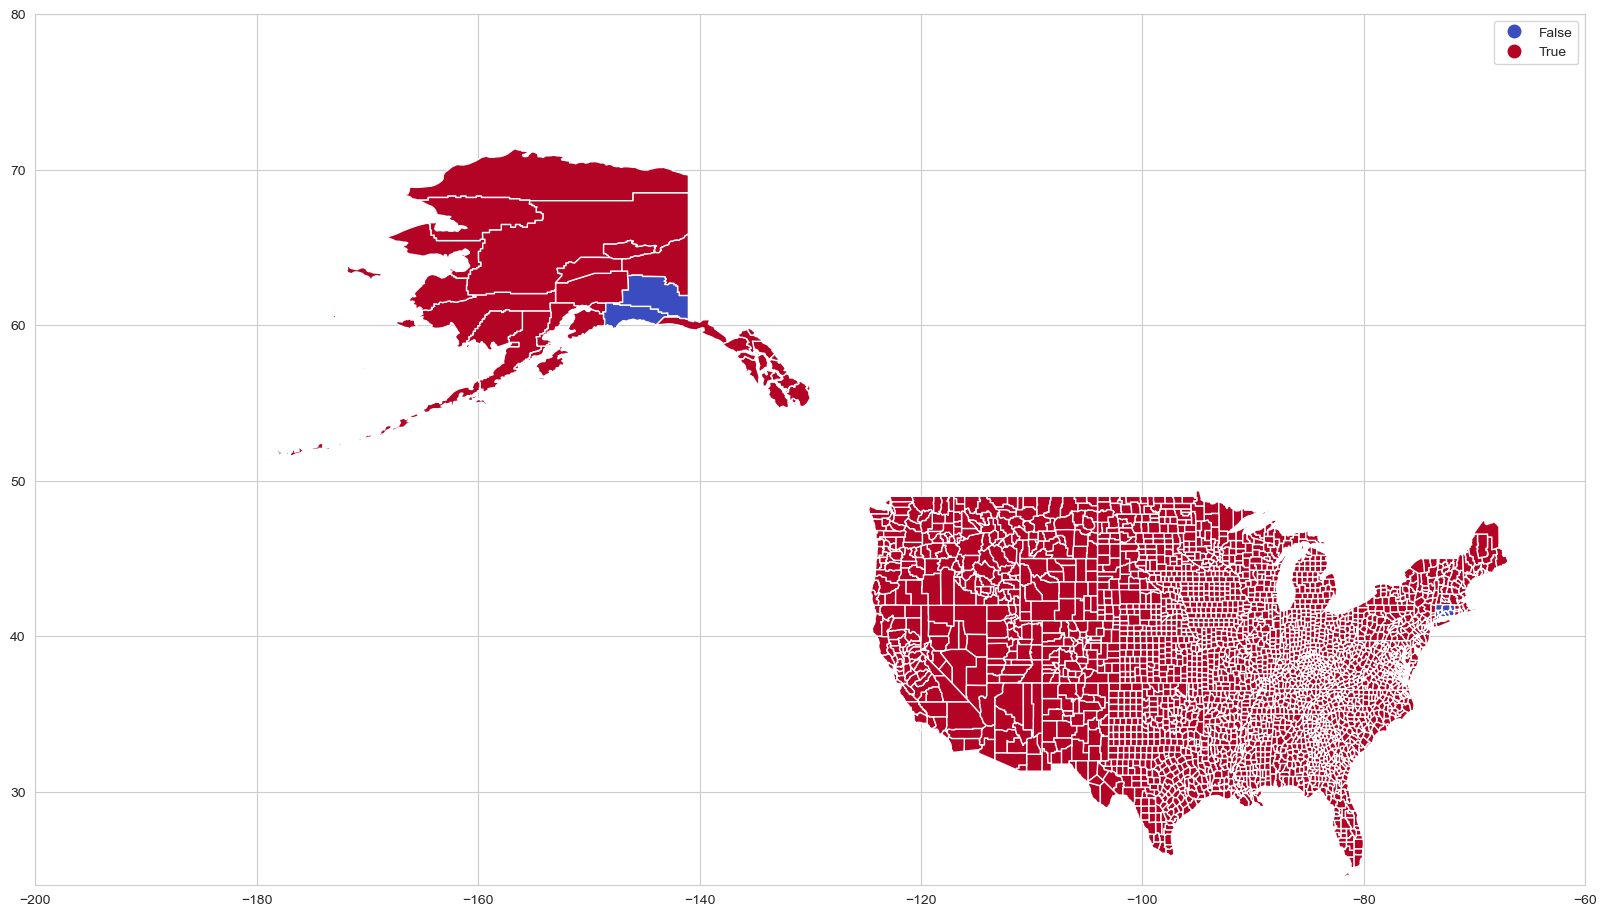

In [90]:
 #Data preparation for which counties we have data and for which we don't


# Step 1 : Combine state and county for lookup
df['state_county'] = df['state'] + '-' + df['county']

# Step 2: Use a FIPS reference file
fips_ref = pd.read_csv("https://raw.githubusercontent.com/kjhealy/fips-codes/master/state_and_county_fips_master.csv")

## there were few State-County pairs in DF dataFrame which did not exist in Fibs Data Set, appending FIBS code for these data sets 
new_data = pd.DataFrame({
'fips':['02158','17099','29211','35013','46102'],
'name':['Kusilvak Census Area','La Salle County','Sullivan part','Dona Ana County','Oglala Lakota County'],
'state':['AK','IL','MO','NM','SD']
})

#print(fips_ref.info())
#print(fips_ref.head(2))
#print(new_data.head(1))

fips_ref = pd.concat([fips_ref, new_data], ignore_index = True)


# Check if the new data has been appended correctly
#print(fips_ref[fips_ref['fips'].isin(new_data['fips'])])

# Create same format in ref for join
fips_ref['state_county'] = fips_ref['state'] + '-' + fips_ref['name']
fips_ref['fips'] = fips_ref['fips'].apply(lambda x: str(x).zfill(5))


# Merge to get FIPS in your dataset
if 'fips' in df.columns:
    df = df.drop(columns='fips')

df = df.merge(fips_ref[['state_county', 'fips']], on='state_county', how='left')

# Step 3: Load shapefile
# Load US counties shapefile (from geopandas' datasets)
#us_counties = gpd.read_file("C:/Users/kdhru/Documents/maps/cb_2022_us_county_20m/cb_2022_us_county_20m.shp")
us_counties = gpd.read_file('../data/cb_2022_us_county_20m/cb_2022_us_county_20m.shp')

# Step 4: Add a flag for counties that exist in your data
us_counties['has_data'] = us_counties['GEOID'].isin(df['fips'])

# Step 5: Plot
#us_counties.plot(column='has_data', legend=True, figsize=(15,10), cmap='coolwarm')

ax = us_counties.plot(column='has_data', legend=True, figsize=(20, 15), cmap='coolwarm')

# Set the limits to focus on the USA region
ax.set_xlim(-200, -60)  # Longitude range for the USA
ax.set_ylim(24, 80)     # Latitude range for the contiguous USA

plt.show()

Rough work to invistigate missing FIBS value for State-county pair

In [91]:
missing_fips = df[df['fips'].isna()]

missing_summary = missing_fips['state_county'].value_counts().reset_index()
missing_summary.columns = ['state_county', 'missing_count']
print(missing_summary)

Empty DataFrame
Columns: [state_county, missing_count]
Index: []


Data for missing counties

In [92]:
us_counties.groupby('has_data').size()

has_data
False      89
True     3133
dtype: int64

In [93]:
us_counties[us_counties['has_data'] == False]

missing_summary = us_counties[us_counties['has_data'] == False]
missing_count_by_state = missing_summary.groupby(['STATE_NAME']).size().reset_index(name='missing_count')

print(missing_count_by_state)



    STATE_NAME  missing_count
0       Alaska              2
1  Connecticut              9
2  Puerto Rico             78


### **Data Enrichment**
#### **Data Transformation / Feature Engineering**

New fields :
1. delta_cost_of_living = Difference in calculated Cost of Living - total_cost [Note: should be 0 for all rows]
2. family_size = Parents + Children 
3. house_hold_size = if family_size is 1 then single (0) else family ())
4. Full state Name - 'state' only has state code (e.g. AL instead of Alabama) 

In [94]:
# Is there any difference between Cost of Living and Total Cost ?

df['total_cost_calculated'] = df['housing_cost'] + df['food_cost'] + df['transportation_cost'] + df['healthcare_cost'] + df['other_necessities_cost'] + df['childcare_cost'] + df['taxes']

df['delta_total_cost'] = df['total_cost_calculated'] - df['total_cost']
df['delta_total_cost'] = df['delta_total_cost'].astype(int)

df[(df['delta_total_cost'] < 0 ) | (df['delta_total_cost'] > 0) ].head(3)

df.groupby(['delta_total_cost'])['delta_total_cost'].sum()


# conclusion total_cost is summation of all types of costs available in the data set. 

delta_total_cost
0    0
Name: delta_total_cost, dtype: int32

In [95]:
# Drop calculated columns 
df = df.drop(['delta_total_cost','total_cost_calculated'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [96]:
# Map state codes to state names
df['state_name'] = df['state'].map(us_states)

df.head(3)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,state_county,fips,state_name
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,AL-Autauga County,01001,Alabama
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,AL-Autauga County,01001,Alabama
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,AL-Autauga County,01001,Alabama


In [97]:
# Since family_member_count is highly structured, we don't need to do anything fancy to extract the number of parents/children.

df['parent_count'] = df['family_member_count'].str[0].astype(int)
df['children_count'] = df['family_member_count'].str[2].astype(int)
df['family_size'] = df['parent_count'] + df['children_count']

df.head(10)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,...,childcare_cost,taxes,total_cost,median_family_income,state_county,fips,state_name,parent_count,children_count,family_size
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,...,0.0000,6392.94504,39254.0532,73010.414062,AL-Autauga County,01001,Alabama,1,0,1
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,...,6147.8298,7422.07836,57194.3256,73010.414062,AL-Autauga County,01001,Alabama,1,1,2
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,...,15824.6940,9769.56228,76141.0308,73010.414062,AL-Autauga County,01001,Alabama,1,2,3
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,...,18802.1892,13101.70320,94203.5328,73010.414062,AL-Autauga County,01001,Alabama,1,3,4
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,...,18802.1892,13469.21880,100823.5200,73010.414062,AL-Autauga County,01001,Alabama,1,4,5
5,1,AL,True,"Montgomery, AL MSA",Autauga County,2p0c,10180.29420,6334.01436,12861.88680,11474.95968,...,0.0000,8236.73076,55071.6684,73010.414062,AL-Autauga County,01001,Alabama,2,0,2
6,1,AL,True,"Montgomery, AL MSA",Autauga County,2p1c,12067.50240,7883.31888,13589.11200,14397.03720,...,6147.8298,9459.90240,70773.6744,73010.414062,AL-Autauga County,01001,Alabama,2,1,3
7,1,AL,True,"Montgomery, AL MSA",Autauga County,2p2c,12067.50240,9984.05268,14723.60760,17319.11280,...,15824.6940,11168.75028,89077.8696,73010.414062,AL-Autauga County,01001,Alabama,2,2,4
8,1,AL,True,"Montgomery, AL MSA",Autauga County,2p3c,15257.15040,12189.77040,14994.60000,20241.18720,...,18802.1892,13210.14840,104640.1524,73010.414062,AL-Autauga County,01001,Alabama,2,3,5
9,1,AL,True,"Montgomery, AL MSA",Autauga County,2p4c,15257.15040,14917.35840,15064.26360,23163.26520,...,18802.1892,13417.21920,111554.8596,73010.414062,AL-Autauga County,01001,Alabama,2,4,6


In [98]:
# visulize 
df.groupby(['family_member_count']).agg(count_all = ('family_size', 'sum'),
    cnt_children = ('children_count', 'sum'),
    cnt_parent = ('parent_count', 'sum'),
)

,count_all,cnt_children,cnt_parent
family_member_count,,,
1p0c,3143,0,3143
1p1c,6286,3143,3143
1p2c,9429,6286,3143
1p3c,12572,9429,3143
1p4c,15715,12572,3143
2p0c,6286,0,6286
2p1c,9429,3143,6286
2p2c,12572,6286,6286
2p3c,15715,9429,6286


In [99]:
# Calculate contributor percentage
df["Housing_%"] = (df["housing_cost"] / df["total_cost"]) * 100
df["Transportation_%"] = (df["transportation_cost"] / df["total_cost"]) * 100
df["Healthcare_%"] = (df["healthcare_cost"] / df["total_cost"]) * 100

In [100]:
# Showing the updated DataFrame
df.head(5)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,...,median_family_income,state_county,fips,state_name,parent_count,children_count,family_size,Housing_%,Transportation_%,Healthcare_%
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,...,73010.414062,AL-Autauga County,01001,Alabama,1,0,1,21.668409,27.587390,14.616274
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,...,73010.414062,AL-Autauga County,01001,Alabama,1,1,2,21.099125,20.261088,15.140587
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,...,73010.414062,AL-Autauga County,01001,Alabama,1,2,3,15.848882,16.235369,15.210764
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,...,73010.414062,AL-Autauga County,01001,Alabama,1,3,4,16.195943,14.279917,15.396140
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,...,73010.414062,AL-Autauga County,01001,Alabama,1,4,5,15.132531,13.632333,17.283453


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

---

## **3. Analysis**

#### **Metropolitan vs. Non-Metropolitan Areas: Miguel**

Metropolitan areas typically have higher living costs, particularly for housing, transportation, and goods. Non-metropolitan areas generally exhibit a lower cost of living relative to income. This disparity is largely due to differences in housing markets, public transportation availability, and the concentration of goods and services in urban areas.

In [102]:
# Regarding the Metropolitan vs. Non-Metropolitan areas cost of living. The dataset contains a column called 'isMetro' which indicates whether the area is metropolitan or not.
# We can use this column to filter the DataFrame and analyze the cost of living in metropolitan vs non-metropolitan areas.
df.groupby(['isMetro']).agg(average_TOTAL_COST=('total_cost', lambda x: f"${x.mean():,.2f}"))


,average_TOTAL_COST
isMetro,
False,"$67,588.02"
True,"$76,489.60"


In [103]:
# We can also visualize the average cost of living in metropolitan vs non-metropolitan areas of all the expenses that contribute to the total cost of living.
cost_means = df.groupby(['isMetro']).agg(average_TOTAL_COST=('total_cost', 'mean'),
                                        average_housing_cost=('housing_cost', 'mean'),
                                        average_food_cost=('food_cost', 'mean'),
                                        average_transportation_cost=('transportation_cost', 'mean'),
                                        average_healthcare_cost=('healthcare_cost', 'mean'),
                                        average_other_necessities_cost=('other_necessities_cost', 'mean'),
                                        average_childcare_cost=('childcare_cost', 'mean'),
                                        average_taxes=('taxes', 'mean')
)
# For visualization purposes, we can also convert the means to a currency format
formatted_cost_means = df.groupby(['isMetro']).agg(average_TOTAL_COST=('total_cost', lambda x: f"${x.mean():,.2f}"),
                                         average_housing_cost=('housing_cost', lambda x: f"${x.mean():,.2f}"),
                                         average_food_cost=('food_cost', lambda x: f"${x.mean():,.2f}"),
                                         average_transportation_cost=('transportation_cost', lambda x: f"${x.mean():,.2f}"),
                                         average_healthcare_cost=('healthcare_cost', lambda x: f"${x.mean():,.2f}"),
                                         average_other_necessities_cost=('other_necessities_cost', lambda x: f"${x.mean():,.2f}"),
                                         average_childcare_cost=('childcare_cost', lambda x: f"${x.mean():,.2f}"),
                                         average_taxes=('taxes', lambda x: f"${x.mean():,.2f}"))
formatted_cost_means

,average_TOTAL_COST,average_housing_cost,average_food_cost,average_transportation_cost,average_healthcare_cost,average_other_necessities_cost,average_childcare_cost,average_taxes
isMetro,,,,,,,,
False,"$67,588.02","$9,895.31","$8,165.38","$13,721.75","$13,707.95","$6,544.10","$8,729.84","$6,823.69"
True,"$76,489.60","$13,060.78","$8,493.45","$13,378.19","$12,864.67","$7,809.95","$11,818.43","$9,064.14"


In [104]:
# Compare metropolitan (True) vs non-metropolitan (False) costs
is_metro_more_expensive = (cost_means.loc[True] > cost_means.loc[False]).replace({True: 'yes', False: 'no'})

# Convert the result to a DataFrame for better readability
summary_df = is_metro_more_expensive.to_frame(name='Metro More Expensive?')

# Display the summary DataFrame
summary_df

,Metro More Expensive?
average_TOTAL_COST,yes
average_housing_cost,yes
average_food_cost,yes
average_transportation_cost,no
average_healthcare_cost,no
average_other_necessities_cost,yes
average_childcare_cost,yes
average_taxes,yes


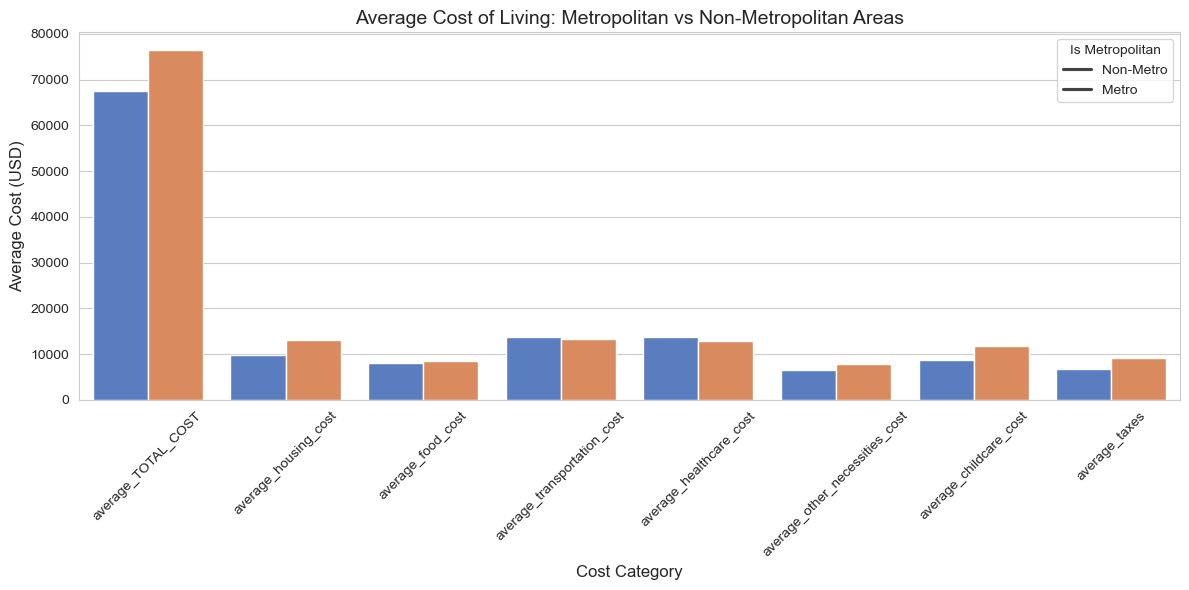

In [105]:
# Let's visualize the average cost of living in metropolitan vs non-metropolitan areas in a bar plot.
# For the bar plot, we will use the average total cost and the average costs of each category, already calculated in cost_means.

# Set the style for the plot
sns.set_style("whitegrid")

# Reset the index of cost_means for easier plotting to be able to use isMetro as a hue
cost_means_reset = cost_means.reset_index()

# Melt the DataFrame to make it suitable for seaborn's barplot
cost_means_melted = cost_means_reset.melt(id_vars=['isMetro'],  # Retain the 'isMetro' column
                                    value_vars=['average_TOTAL_COST', 'average_housing_cost', 'average_food_cost', 'average_transportation_cost', 
                                                'average_healthcare_cost', 'average_other_necessities_cost', 'average_childcare_cost', 'average_taxes'],
                                    var_name='Cost Category', 
                                    value_name='Average Cost')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=cost_means_melted, x='Cost Category', y='Average Cost', hue='isMetro', palette='muted')

# Add labels and title
plt.title('Average Cost of Living: Metropolitan vs Non-Metropolitan Areas', fontsize=14)
plt.xlabel('Cost Category', fontsize=12)
plt.ylabel('Average Cost (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Is Metropolitan', labels=['Non-Metro', 'Metro'])

# Show the plot
plt.tight_layout()
plt.show()

In [106]:
#df["Childcare_%"] = (df["childcare_cost"] / df["total_cost"]) * 100
#df['isMetro'].value_counts()

#### **Key Expense Categories: Dhruv**


Hypothesis: Housing, transportation, and healthcare are the primary contributors to the cost of living. In metropolitan areas, housing tends to be the most significant expense, driven by high demand and limited supply. Transportation costs also tend to be higher in cities with less access to public transit. Non-metropolitan areas may see higher costs in some categories, but they often experience lower housing and transportation costs relative to income.

Objective:

1. How do housing, transportation, and healthcare costs compare between metropolitan and non-metropolitan regions?

Analysis Method:

1. show a bar chart with sum of contributors accross US
2. show a bar chart with sum of contributors between Metro Vs Metro
3. Show contributors / total_cost for each state.
4. Show contributors / total_cost comparison between Metro vs Metro

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [108]:
# Calculate Sum of Contributors 
t_contributors = df[["housing_cost", "transportation_cost", "healthcare_cost"]].mean()
t_metro_contributors = df.groupby(['isMetro'])[["housing_cost", "transportation_cost","healthcare_cost"]].mean()

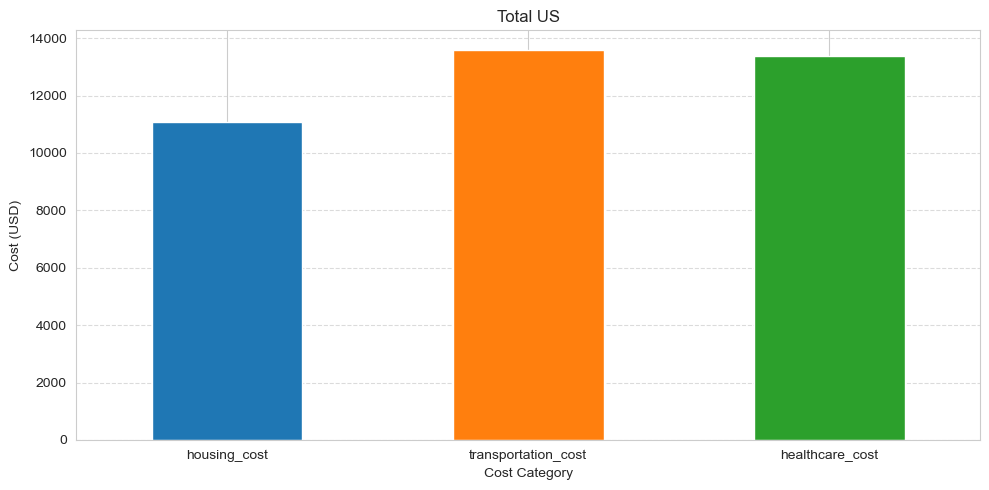

In [109]:
t_contributors.plot(kind='bar', figsize=(10, 5), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.title('Total US')
plt.ylabel('Cost (USD)')
plt.xlabel('Cost Category')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observation 1:** Surprisingly out of Housing Cost, transportation and Healthcare costs. Cost for Transportation is higest, followed closely by healthcare cost and lowest is housing cost. Which is opposite of the assumptions

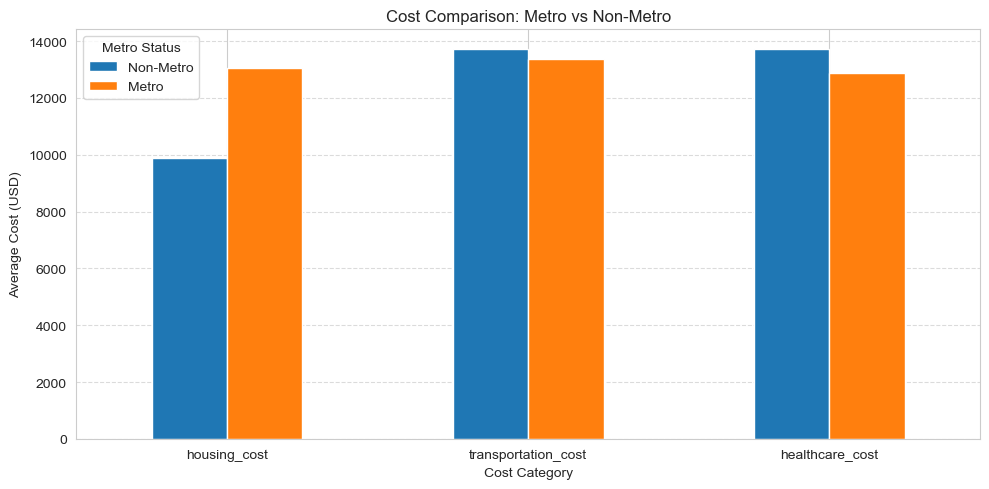

In [110]:
ax = t_metro_contributors.T

# Rename the index so it's clean for plotting
ax.index.name = 'Cost Category'

# Plot
ax.plot(kind='bar', figsize=(10, 5), color=['#1f77b4', '#ff7f0e'])

plt.title('Cost Comparison: Metro vs Non-Metro')
plt.ylabel('Average Cost (USD)')
plt.xlabel('Cost Category')
plt.xticks(rotation=0)

# Add legend based on isMetro values
plt.legend(title='Metro Status', labels=['Non-Metro', 'Metro'])  # Adjust order if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Observation 2:** Comparing housing, transportation and healthcare costs between Metro vs Non-Metro. There is not much difference between transportation costs and healthcare costs between Metro and Non-Metro. However, Housing cost on average is higher in Metro which is expected.

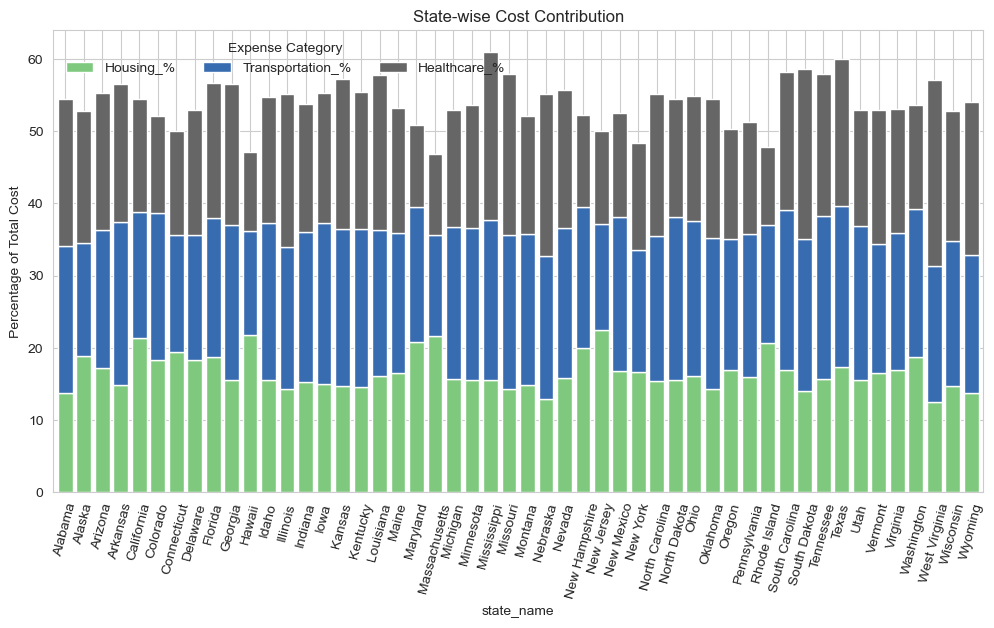

In [111]:
# State-wise comparison using pivot table
state_pivot = df.groupby(['state_name'])[["Housing_%", "Transportation_%","Healthcare_%"]].mean()

# Plotting state-wise cost contribution
#state_pivot.plot(kind="bar", stacked=True, figsize=(12, 6))
state_pivot.plot(kind="bar", stacked=True, figsize=(12, 6), width=0.8, colormap="Accent")

plt.title("State-wise Cost Contribution")
plt.ylabel("Percentage of Total Cost")
#plt.legend(title="Expense Category")
# Expense Category Legend
plt.legend(title="Expense Category",  loc='upper left', ncol=3, frameon=False)

plt.xticks(rotation=75)
plt.show()

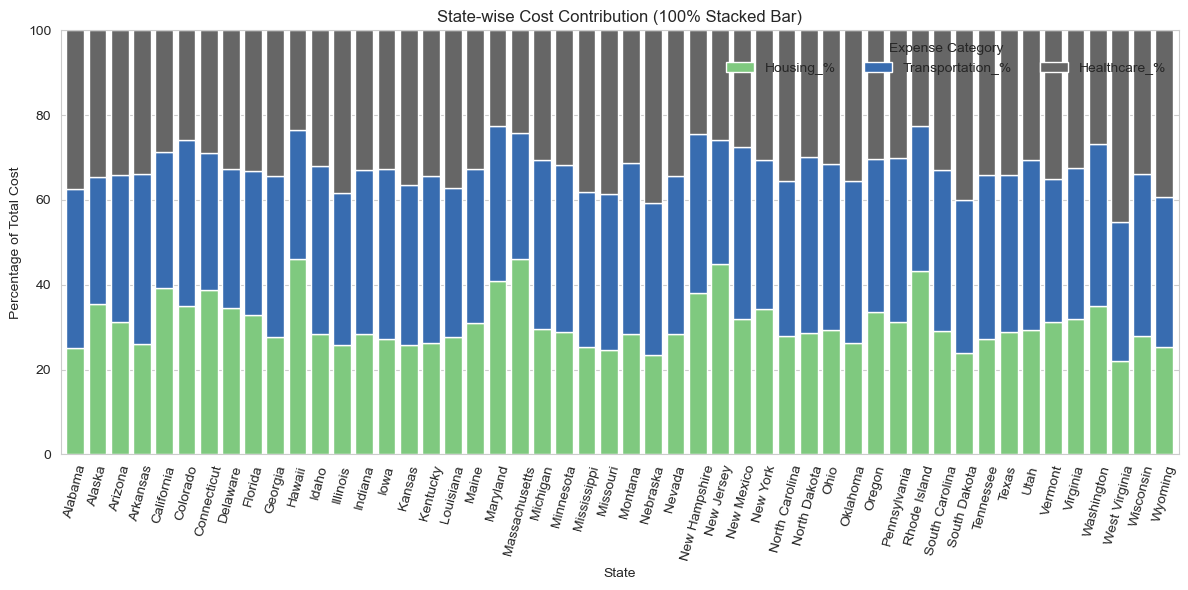

In [112]:
# Group by 'state_name' and calculate the mean of percentage columns
state_pivot = df.groupby('state_name')[["Housing_%", "Transportation_%", "Healthcare_%"]].mean()

# Normalize the values to 100% scale across each row (state)
state_pivot = state_pivot.div(state_pivot.sum(axis=1), axis=0) * 100

# Plotting 100% stacked bar chart
state_pivot.plot(kind="bar", stacked=True, figsize=(12, 6), width=0.8, colormap="Accent")

#colormap="tab20c"

# Set the title and labels
plt.title("State-wise Cost Contribution (100% Stacked Bar)")
plt.ylabel("Percentage of Total Cost")
plt.xlabel("State")

plt.xticks(rotation=75)

# Expense Category Legend
plt.legend(title="Expense Category", ncol=3, frameon=False)

# Ensuring the y-axis ranges from 0 to 100 for a 100% scale
plt.ylim(0, 100)

# Display the plot
plt.tight_layout()
plt.show()

To Do - Metro vs Non-Metro (Key Expense Categories)

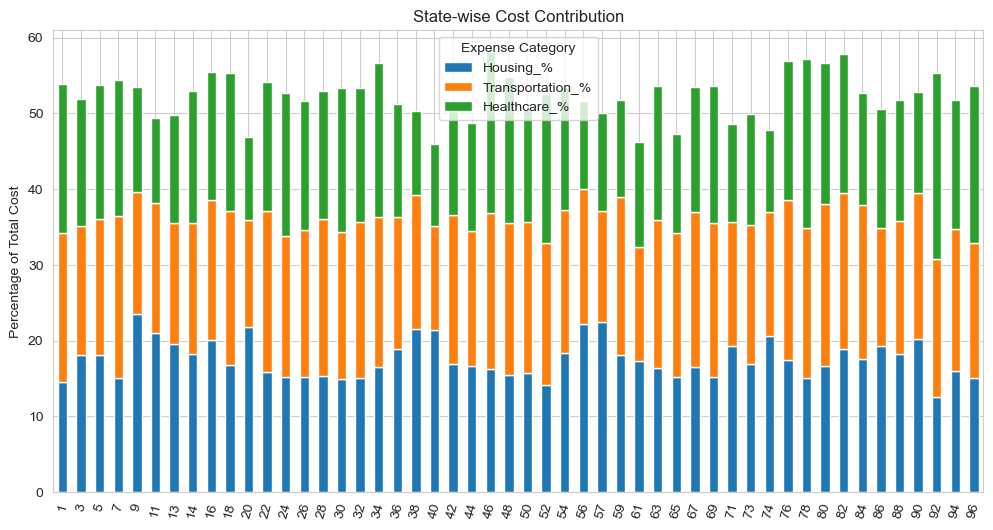

In [113]:
# Plotting Overall Costs of Housing_cost, transportation_cost and Healthcare_cost

state_pivot = df.groupby(['state_name','isMetro'])[["Housing_%", "Transportation_%","Healthcare_%"]].mean()

state_pivot_reset = state_pivot.reset_index()

#print(state_pivot_reset.head())
#state_pivot.head(5)
# Filter metro and non-metro data
metro_data = state_pivot_reset[state_pivot_reset['isMetro'] == True]
non_metro_data = state_pivot_reset[state_pivot_reset['isMetro'] == False]


# Plot for Metro counties
metro_data.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("State-wise Cost Contribution")
plt.ylabel("Percentage of Total Cost")
plt.legend(title="Expense Category")
plt.xticks(rotation=75)
plt.show()


# Show the plots

#plt.show()


#### **Cost of Living and Household Size: Faiza**

In [114]:
# cost columns'food', 'transportation', 'housing', etc.
cost_columns = ['food_cost', 'transportation_cost', 'housing_cost', 'other_necessities_cost', 'healthcare_cost', 'childcare_cost']  # Adjust as per your dataset

# Group by household size and calculate the average cost for each category
df_grouped = df.groupby('family_member_count')[cost_columns].mean()

df_grouped.head()

,food_cost,transportation_cost,housing_cost,other_necessities_cost,healthcare_cost,childcare_cost
family_member_count,,,,,,
1p0c,3201.691141,11108.207741,7497.340581,3876.681129,5353.664910,0.000000
1p1c,4718.446311,11913.111037,10221.165572,5413.210559,8087.009036,7089.763015
1p2c,6910.231817,12860.038357,10221.165572,6207.380910,10730.787211,12909.024683
1p3c,9219.666668,13527.420120,13539.024320,8246.371265,13374.565570,14699.566733
1p4c,11286.256705,13922.695115,13539.024320,8995.178361,16018.343717,14699.566733


In [115]:
# Calculate the total cost of living for each row by summing the relevant columns
df['total_cost_of_living'] = df[cost_columns].sum(axis=1)

# Group by household size and calculate the total cost of living for each size
total_cost_by_size = df.groupby('family_member_count')['total_cost_of_living'].mean()

# Display the results
total_cost_by_size

family_member_count
1p0c    31037.585503
1p1c    47442.705530
1p2c    59838.628550
1p3c    72606.614675
1p4c    78461.064951
2p0c    43071.546539
2p1c    58541.720868
2p2c    70306.530103
2p3c    82433.862981
2p4c    88699.428640
Name: total_cost_of_living, dtype: float64

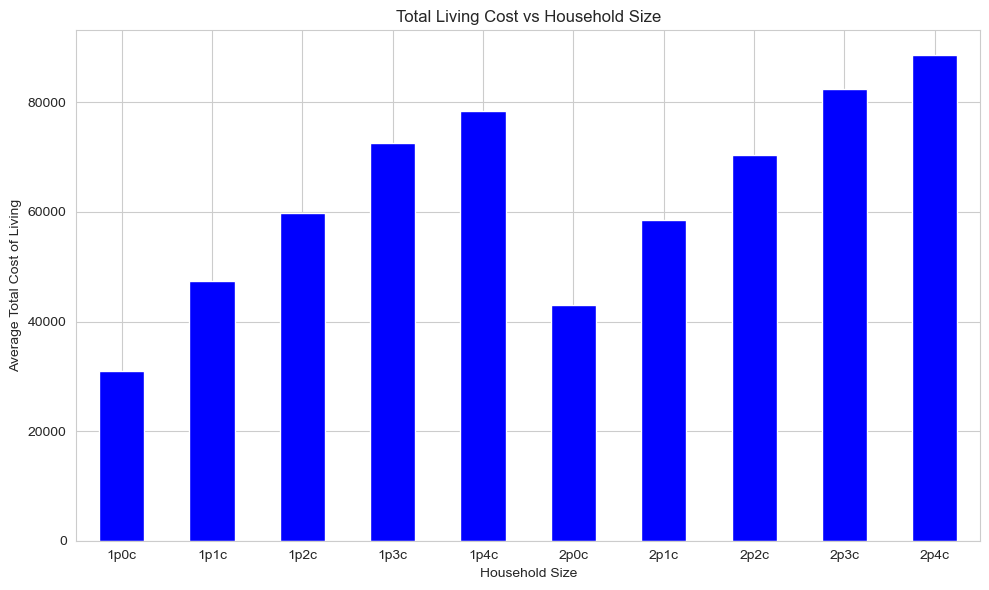

In [116]:
# Plotting the total living cost vs household size
plt.figure(figsize=(10, 6))
total_cost_by_size.plot(kind='bar', color='blue')

# Adding title and labels
plt.title('Total Living Cost vs Household Size')
plt.xlabel('Household Size')
plt.ylabel('Average Total Cost of Living')
plt.xticks(rotation=0)  # Keep x labels horizontal

#show plot
plt.tight_layout()
plt.show()

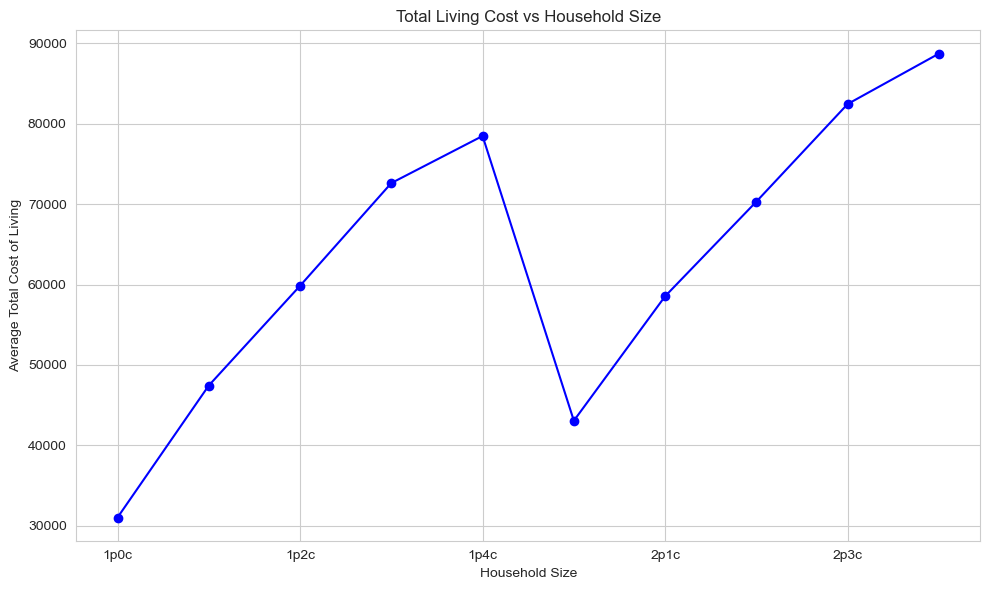

In [117]:
# Plotting the total living cost vs household size using a line graph
plt.figure(figsize=(10, 6))
total_cost_by_size.plot(kind='line', marker='o', color='b')

# Adding title and labels
plt.title('Total Living Cost vs Household Size')
plt.xlabel('Household Size')
plt.ylabel('Average Total Cost of Living')
plt.xticks(rotation=0)  # Keep x labels horizontal

# Show plot
plt.tight_layout()
plt.show()

In [118]:
#The analysis focuses on how family size impacts the total cost of living across various expense categories such as housing, food, transportation, utilities, healthcare, and education. By examining the relationship between household size and the total cost of living, we observe that as the number of family members increases, the total cost also increases, though not in a linear fashion.

#For smaller households (1-2 children), costs rise moderately. However, for families with 3 or more children, the costs increase at a faster rate, particularly in categories like housing (more space needed), food (more people to feed), and transportation (additional vehicles or larger ones). Costs for utilities and education rise more slowly but still contribute to the overall increase.

#The analysis suggests that while basic expenses like food and utilities scale somewhat predictably, the largest cost increases are driven by the need for larger living spaces and additional resources for healthcare and education. This information helps highlight the financial challenges larger families face and can guide decisions around budgeting and long-term planning.

#### **Exploring Linearity (or Non-Linearity) of Costs as a Function of Household Size: Eric**

The goal for this section is to determine if the various cost variables are a linear function of the size of the family. There are 8 cost variables - 1 total, and 7 subcategories. We can also choose to consider family size as a single variable or separate it out into 2 variables - the number of parents and the number of children. In principle, all or some or none of the cost variables may be a linear function of family size. It also could be the case that it may not be linear as a function of just the 1 variable, but it is linear as a function of the 2 variables. Thus, we're going to check all 16 combinations.

In addition, it's possible that it might be linear, but the coefficients vary by location, so we'll be filtering the dataset by location as well.

In [119]:
df_states_list = list(df_states)
isMetro_list_bool = [True, False]
cost_list = ['total_cost', 'housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes']

In [120]:
# the following is a function that performs linear regression on the data and returns the r2 scores.
# Specifically, we input a filtered version of our dataframe (eg. df['state'] == NY),
# then it performs linear regression on all 16 combinations of (independent variable(s), dependent variable)
# the independent variable has 2 options - either 'family_size' or 'parent_count' and 'children_count'
# the dependent variable has 8 options described in the cost_list list above
# the 16 r2 scores then get returned in a list

def get_r2_scores_row(df_filtered):
    # in the case where the dataframe has no rows, we'll return a row of 16 None's
    if df_filtered.empty:
        r2_scores_row = [None for i in range(len(cost_list) * 2)]
    else:
        r2_scores_row = []
        for cost in cost_list:
            # we start with finding the r2 score for linear regression with 1 variable
            # by default, this will be a row vector, but sklearn needs the independent variable to be a column vector, so we reshape it
            X = df_filtered['family_size'].values.reshape(-1, 1)
            Y = df_filtered[cost]
            model = sklearn.linear_model.LinearRegression().fit(X, Y)
            r2_scores_row.append(r2_score(Y, model.predict(X)))

            # now we find the r2 score for linear regression with 2 variables
            # no reshaping is necessary here - it's already a 2d array
            X = df_filtered[['parent_count', 'children_count']]
            model = sklearn.linear_model.LinearRegression().fit(X, Y)
            r2_scores_row.append(r2_score(Y, model.predict(X)))
    return r2_scores_row

In [121]:
r2_scores_list = []
r2_scores_list.append(get_r2_scores_row(df))

r2_scores_df = pd.DataFrame(r2_scores_list, 
                            columns = pd.MultiIndex.from_product([cost_list, ['family_size', 'parent_and_children']], names = ['Cost', 'Independant Variables']), 
                            index = ['Entire Dataset'])

In [122]:
r2_scores_list = []
for isMetro in isMetro_list_bool:
    r2_scores_list.append(get_r2_scores_row(df[df['isMetro'] == isMetro]))
    
r2_scores_df_isMetro = pd.DataFrame(r2_scores_list, 
                            columns = pd.MultiIndex.from_product([cost_list, ['family_size', 'parent_and_children']], names = ['Cost', 'Independant Variables']), 
                            index = pd.Index(['True', 'False'], name = 'isMetro'))

In [123]:
r2_scores_list = []
for state in df_states_list:
    r2_scores_list.append(get_r2_scores_row(df[df['state'] == state]))
        
r2_scores_df_state = pd.DataFrame(r2_scores_list, 
                            columns = pd.MultiIndex.from_product([cost_list, ['family_size', 'parent_and_children']], names = ['Cost', 'Independant Variables']), 
                            index = pd.Index(df_states_list, name = 'State'))

In [124]:
r2_scores_list = []
for state in df_states_list:
    for isMetro in isMetro_list_bool:
        r2_scores_list.append(get_r2_scores_row(df[(df['state'] == state) & (df['isMetro'] == isMetro)]))
        
r2_scores_df_state_and_isMetro = pd.DataFrame(r2_scores_list, 
                            columns = pd.MultiIndex.from_product([cost_list, ['family_size', 'parent_and_children']], names = ['Cost', 'Independant Variables']), 
                            index = pd.MultiIndex.from_product([df_states_list, ['True', 'False']], names=['State', 'isMetro']))

Now let's look at the results!

In [125]:
r2_scores_df

Cost                   total_cost                     housing_cost  \
Independant Variables family_size parent_and_children  family_size   
Entire Dataset           0.726471            0.726831     0.226706   

Cost                                        food_cost                      \
Independant Variables parent_and_children family_size parent_and_children   
Entire Dataset                   0.249351    0.904391            0.907924   

Cost                  transportation_cost                     healthcare_cost  \
Independant Variables         family_size parent_and_children     family_size   
Entire Dataset                   0.489367             0.61356        0.729143   

Cost                                      other_necessities_cost  \
Independant Variables parent_and_children            family_size   
Entire Dataset                   0.788931               0.592792   

Cost                                      childcare_cost                      \
Independant Variables parent_and_children    family_size parent_and_children   
Entire Dataset                   0.597064       0.529996            0.596246   

Cost                        taxes                      
Independant Variables family_size parent_and_children  
Entire Dataset           0.119415            0.119835

Relatively speaking, food cost is pretty good and healthcare and the total are okay. Housing and taxes are particularly poor.

Separating the independent variable to 2 variables doesn't have much impact. The biggest increases are for transportation, healthcare and childcare - although it's not much.

As a reminder, by separating out family size to 2 variables, the linear regression model can only ever be more accurate - so the r2 score for the 2 variable case has to be at least the r2 score for the 1 variable case. So since the rest of the costs have very little difference in r2 score, this suggests that for those costs, there is very little difference between parents and children - if it's linear at all, it won't distinguish between parents and children.

In [126]:
r2_scores_df_isMetro

Cost                   total_cost                     housing_cost  \
Independant Variables family_size parent_and_children  family_size   
isMetro                                                              
True                     0.697338            0.699915     0.189901   
False                    0.825634            0.825655     0.450029   

Cost                                        food_cost                      \
Independant Variables parent_and_children family_size parent_and_children   
isMetro                                                                     
True                             0.208469    0.901496             0.90501   
False                            0.495724    0.910329             0.91389   

Cost                  transportation_cost                     healthcare_cost  \
Independant Variables         family_size parent_and_children     family_size   
isMetro                                                                         
True                             0.502793            0.613472        0.753292   
False                            0.495513            0.633977        0.724266   

Cost                                      other_necessities_cost  \
Independant Variables parent_and_children            family_size   
isMetro                                                            
True                             0.811121               0.505577   
False                            0.785840               0.794605   

Cost                                      childcare_cost                      \
Independant Variables parent_and_children    family_size parent_and_children   
isMetro                                                                        
True                             0.510207       0.556712            0.626301   
False                            0.799389       0.582523            0.655338   

Cost                        taxes                      
Independant Variables family_size parent_and_children  
isMetro                                                
True                     0.172245            0.176051  
False                    0.120377            0.133599

The numbers for isMetro vs. not isMetro vs. any are all fairly comparable over all costs and variable split with the exception of housing, other necessities and total cost. Specifically, for all those 3, not Metro has the highest r2 score and Metro has the lowest r2 score.

Housing is still pretty low though. But other necessities in non metro areas does become okay.

In [127]:
r2_scores_df_state.describe()

Cost                   total_cost                     housing_cost  \
Independant Variables family_size parent_and_children  family_size   
count                   51.000000           51.000000    51.000000   
mean                     0.864948            0.868987     0.468821   
std                      0.089668            0.089726     0.152924   
min                      0.539536            0.543408     0.130200   
25%                      0.853550            0.854615     0.357184   
50%                      0.886264            0.889039     0.480854   
75%                      0.917227            0.926725     0.586321   
max                      0.966034            0.966775     0.793843   

Cost                                        food_cost                      \
Independant Variables parent_and_children family_size parent_and_children   
count                           51.000000   51.000000           51.000000   
mean                             0.515568    0.942284            0.946026   
std                              0.168901    0.039357            0.039491   
min                              0.142813    0.818732            0.821913   
25%                              0.390709    0.931288            0.934907   
50%                              0.521667    0.952913            0.956615   
75%                              0.645983    0.969701            0.973469   
max                              0.885305    0.989999            0.993846   

Cost                  transportation_cost                     healthcare_cost  \
Independant Variables         family_size parent_and_children     family_size   
count                           51.000000           51.000000       51.000000   
mean                             0.584765            0.725023        0.864349   
std                              0.122281            0.141394        0.087857   
min                              0.137322            0.173042        0.478520   
25%                              0.529274            0.666538        0.825499   
50%                              0.590249            0.757216        0.898959   
75%                              0.660803            0.802729        0.919160   
max                              0.860095            0.947728        0.979882   

Cost                                      other_necessities_cost  \
Independant Variables parent_and_children            family_size   
count                           51.000000              51.000000   
mean                             0.941527               0.793994   
std                              0.056750               0.134355   
min                              0.821509               0.368251   
25%                              0.888519               0.753459   
50%                              0.966060               0.810407   
75%                              0.991179               0.886587   
max                              1.000000               0.965810   

Cost                                      childcare_cost                      \
Independant Variables parent_and_children    family_size parent_and_children   
count                           51.000000      51.000000           51.000000   
mean                             0.800025       0.681703            0.766915   
std                              0.134520       0.069736            0.078453   
min                              0.374918       0.470547            0.529365   
25%                              0.757949       0.649915            0.731154   
50%                              0.816227       0.685565            0.771260   
75%                              0.892441       0.733578            0.825276   
max                              0.975035       0.774891            0.871752   

Cost                        taxes                      
Independant Variables family_size parent_and_children  
count                   51.000000           51.000000  
mean                     0.378117            0.416559  
std        

We're not going to look at each state individually at this time - that could run into issues with cherrypicking the best r2 scores, not to mention the significant complexity increase. Instead, we'll be focussing on the distribution of r2 scores - are they comparable to the r2 scores from the top? If so, there probably isn't much value in partitioning the dataset in this way. Alternatively, we might see significant increases collectively - this could indicate that cost is roughly linear, but the exact coefficients vary by location and so by computing the linear regression for each location, we get better models.

Food cost improves a bit, but was already pretty good. Healthcare with 2 independent variables is now just as good. Total cost and healthcare (with 1 independent variable) also improve and are good. Housing and taxes both significantly improve, but remain disappointing. The rest improve a bit and are okay.

In [128]:
r2_scores_df_state_and_isMetro.describe()

Cost                   total_cost                     housing_cost  \
Independant Variables family_size parent_and_children  family_size   
count                   98.000000           98.000000    98.000000   
mean                     0.905996            0.910616     0.561919   
std                      0.073265            0.072355     0.164116   
min                      0.513377            0.519468     0.126473   
25%                      0.887837            0.892931     0.452504   
50%                      0.922783            0.927181     0.586495   
75%                      0.953076            0.957112     0.691993   
max                      0.977708            0.978832     0.807879   

Cost                                        food_cost                      \
Independant Variables parent_and_children family_size parent_and_children   
count                           98.000000   98.000000           98.000000   
mean                             0.617820    0.951264            0.955046   
std                              0.181227    0.041296            0.041463   
min                              0.138536    0.767429            0.770410   
25%                              0.495572    0.941894            0.945553   
50%                              0.640342    0.963145            0.966887   
75%                              0.771875    0.975267            0.979238   
max                              0.885305    0.989999            0.993846   

Cost                  transportation_cost                     healthcare_cost  \
Independant Variables         family_size parent_and_children     family_size   
count                           98.000000           98.000000       98.000000   
mean                             0.608677            0.755810        0.869358   
std                              0.117182            0.136113        0.088434   
min                              0.119771            0.153523        0.472166   
25%                              0.551939            0.707512        0.843679   
50%                              0.606082            0.770468        0.905360   
75%                              0.679085            0.847744        0.921781   
max                              0.860095            0.980569        0.979882   

Cost                                      other_necessities_cost  \
Independant Variables parent_and_children            family_size   
count                           98.000000              98.000000   
mean                             0.947009               0.842177   
std                              0.056611               0.122476   
min                              0.792258               0.360517   
25%                              0.909924               0.786393   
50%                              0.972213               0.871730   
75%                              0.992999               0.929995   
max                              1.000000               0.972104   

Cost                                      childcare_cost                      \
Independant Variables parent_and_children    family_size parent_and_children   
count                           98.000000      98.000000           98.000000   
mean                             0.848884       0.734759            0.826604   
std                              0.122469       0.031867            0.035850   
min                              0.363757       0.620768            0.698364   
25%                              0.794579       0.714504            0.803817   
50%                              0.878562       0.735735            0.827702   
75%                              0.937840       0.763378            0.858800   
max                              0.978550       0.784592            0.882666   

Cost                        taxes                      
Independant Variables family_size parent_and_children  
count                   98.000000           98.000000  
mean                     0.472081            0.548436  
std        

Partitioning even further improves the r2 scores across the board even more. However, it remains a similar story to above - food, total cost and healthcare (with 2 independent variables) are pretty strongly linear. Housing and taxes remain disappointingly low - they're maybe not linear. Transportation is on the fence and other necessities and childcare are maybe linear.

Transportation sees the biggest increase by separating the independent variable. Housing, healthcare, childcare and taxes all see a moderate increase. Total cost, food and other necessities all seem to have comparable numbers - there probably isn't any value in separating the independent variable for them.

One of the main conclusions is that food cost is linear as a function of merely family size - unlike total cost and healthcare, this is simple enough to graph!

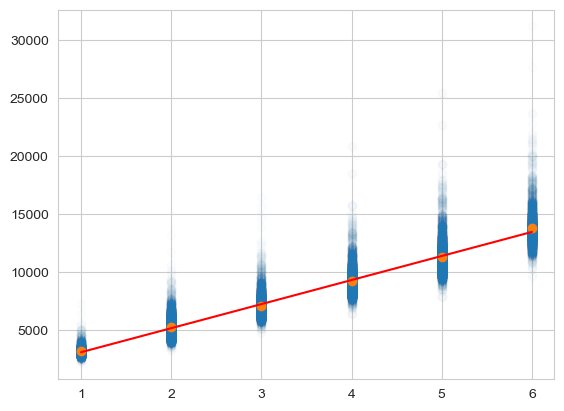

In [129]:
X = df['family_size'].values.reshape(-1, 1)
Y = df['food_cost']

model = sklearn.linear_model.LinearRegression().fit(X, Y)

# scatter plot of the data, the points are mostly transparent to help indicate where they are distributed.
plt.scatter(x=X, y=Y, alpha=0.01)
# the line of best fit
plt.plot(X, model.predict(X), 'r-')
# extra points to indicate the average food cost for each value of family size
plt.scatter(x=[i+1 for i in range(6)], y=df.groupby(['family_size'])['food_cost'].mean())

In [130]:
print(np.sqrt(mean_squared_error(Y, model.predict(X))))
print(r2_score(Y, model.predict(X)))

1011.4446868354278
0.9043907826132225


Having an integer for an independent variable is not ideal for scatter plots. That being said, it does show that the line of best fit does a pretty good job of passing through the average food costs for each family size. Along with the RMSE being only 1011, it does mean that the points are clustered around the predicted values - the transparency helps, but it doesn't quite do it justice.

#### **Regional Variation: Jack**

#### **Individual Expense Categories: Lucas**